Импортируем необходимые библиотеки

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

Прочитаем файл и проанализируем данные. Как можно видет Outcome явялется целевой переменной

In [63]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [64]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Как можно видеть из вывода в данных пропуски отсутствуют, поэтому дополнительной обработки не требуется

Рассчитываем количество, мат ожидание, вариацию, среднее отклонение, минимум, квантиль 25, квантиль 50, квантиль 75 и максимум

In [65]:
mean_values = {}
variance_values = {}
std_values = {}
quantile_25 = {}
quantile_50 = {}
quantile_75 = {}
min_values = {}
max_values = {}
count_values = {}
for column in df.columns:
    data = df[column]
    mean = sum(data)/len(data)
    mean_values[column] = mean
    variance = sum((x - mean)**2 for x in data)/(len(data)-1)
    variance_values[column] = variance
    count_values[column] = data.count()
    std_values[column] = sqrt(variance)
    quantile_25[column] = np.percentile(data, 25)
    quantile_50[column] = np.percentile(data, 50)
    quantile_75[column] = np.percentile(data, 75)
    min_values[column] = min(data)
    max_values[column] = max(data)
stats_df = pd.DataFrame({
    'count': count_values,
    'mean': mean_values,
    'variance': variance_values,
    'std_dev': std_values,
    'min': min_values,
    'quantile_25': quantile_25,
    'quantile_50': quantile_50,
    'quantile_75': quantile_75,
    'max': max_values
})
stats_df = stats_df.T
stats_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
variance,11.354056,1022.248314,374.647271,254.473245,13281.180078,62.159984,0.109779,138.303046,0.227483
std_dev,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
quantile_25,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
quantile_50,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
quantile_75,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Строим гистограммы распределения для всех признаков и целевой переменной

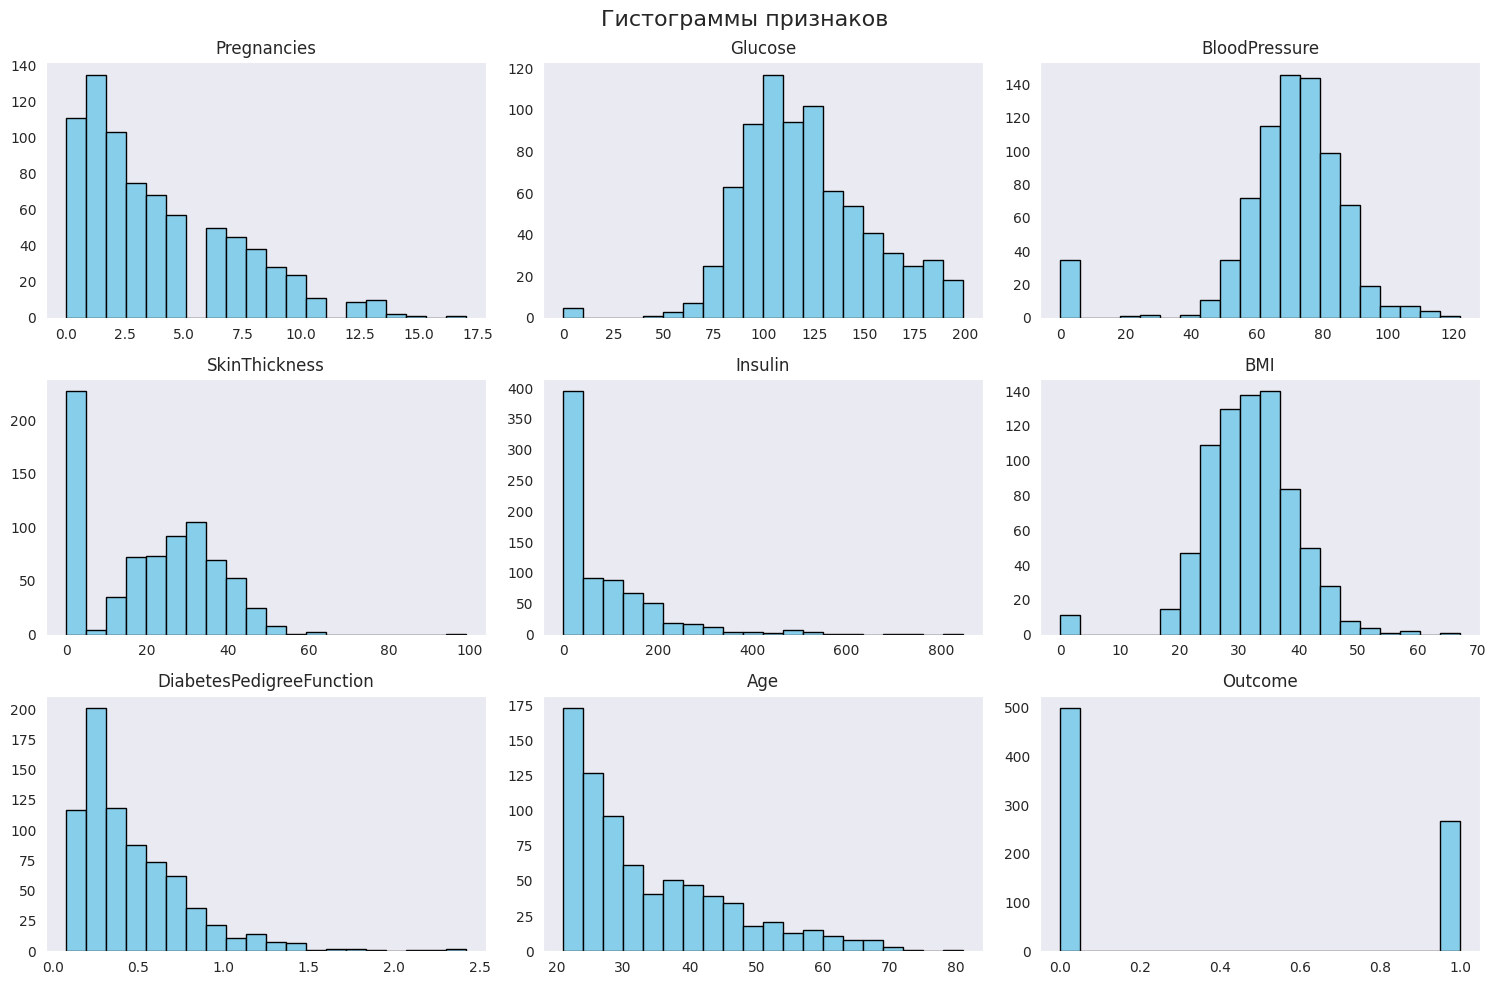

In [66]:
df.hist(bins=20, figsize=(15,10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы признаков', fontsize=16)
plt.tight_layout()
plt.show()

Строим матрицу корреляции для того, чтобы определить какие признаки имеют сильную взаимосвязь между собой. Если связь сильная значит признаки имеют мультиколлинеарность.

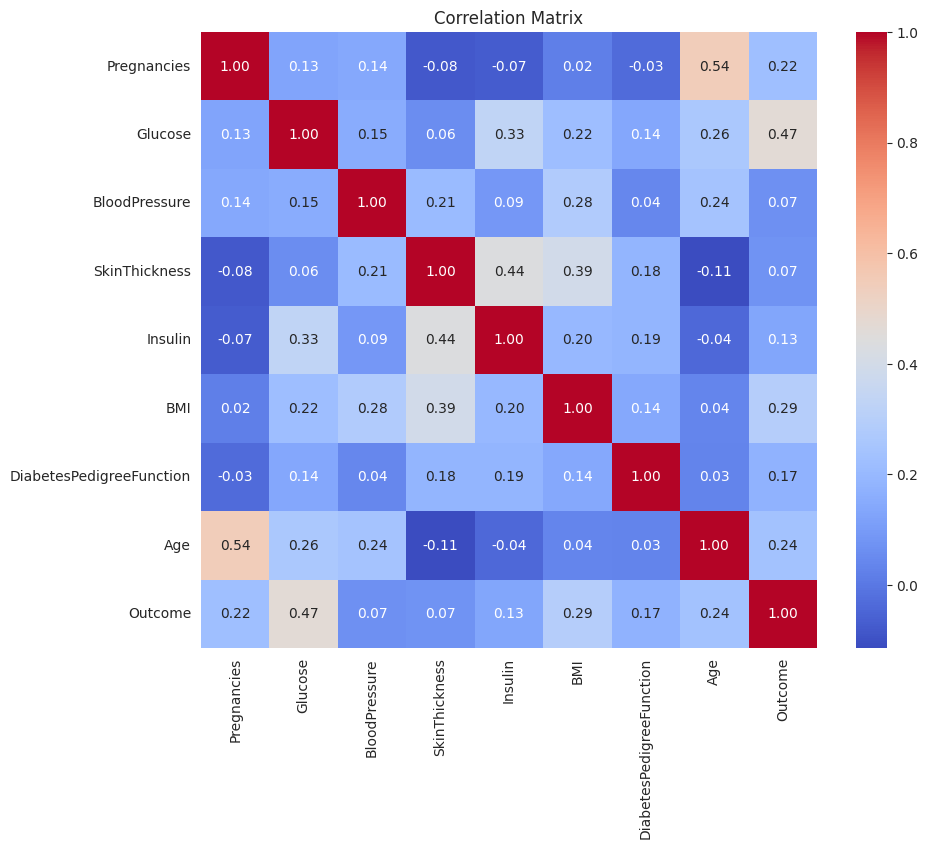

In [67]:
def show_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.show()

show_correlation_matrix(df)

Применяем Мин-Макс нормализацию, чтобы наши значения располагались в диапазоне от 0 до 1

In [68]:
df_min = df.min()
df_max = df.max()
df_normalised = (df - df_min)/(df_max - df_min)
df_normalised.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X = df_normalised.drop(columns=['Outcome'])
Y = df_normalised['Outcome']
np.random.seed(42)
indices = np.random.permutation(len(X))
test_size = 0.2
test_samples = int(len(X) * test_size)
train_indices = indices[test_samples:]
test_indices = indices[:test_samples]
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]
print(f"Количество элементов в обучающей выборке X: {X_train.shape}")
print(f"Количество элементов в тестовой выборке X: {X_test.shape}")
print(f"Количество элементов в обучающей выборке Y: {Y_train.shape}")
print(f"Количество элементов в тестовой выборке Y: {Y_test.shape}")

print("Распределение классов в обучающей выборке:")
print(Y_train.value_counts())
print(Y_test.value_counts())

Количество элементов в обучающей выборке X: (615, 8)
Количество элементов в тестовой выборке X: (153, 8)
Количество элементов в обучающей выборке Y: (615,)
Количество элементов в тестовой выборке Y: (153,)
Распределение классов в обучающей выборке:
Outcome
0.0    402
1.0    213
Name: count, dtype: int64
Outcome
0.0    98
1.0    55
Name: count, dtype: int64


In [70]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [71]:
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [72]:
def gradient_descent(X, Y, weights, bias, learning_rate):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    dw = np.dot(X.T, (y_pred - Y)) / m
    db = np.sum(y_pred - Y) / m
    weights -= learning_rate*dw
    bias -= learning_rate*db
    return weights, bias

def newton_method(X, Y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights)+bias
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - Y)) / m
    H = np.dot(X.T, np.diag(y_pred*(1 - y_pred)).dot(X)) / m
    H_inv = np.linalg.inv(H + np.eye(X.shape[1]) * 1e-5)
    weights -= np.dot(H_inv, gradient)
    bias -= np.sum(y_pred - Y) / m
    return weights, bias
    

In [73]:
def train_logistic_regression(X, Y, learning_rate=0.01, iterations_count=1000, method=1):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []
    for i in range(iterations_count):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        loss = log_loss(Y, y_pred)
        losses.append(loss)
        if method == 1:
            weights, bias = gradient_descent(X, Y, weights, bias, learning_rate)
        elif method == 2:
            weights, bias = newton_method(X, Y, weights, bias)
        
        if i % 100 == 0 or i == iterations_count - 1:
            print(f"Итерация {i}, Потери: {loss:.6f}")
    return weights, bias, losses

In [85]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
iterations_count = [100, 500, 1000, 2000]
optimization_method = [1, 2]
results = {}
for method in optimization_method:
    for rate in learning_rates:
        for count in iterations_count:
            print(f"\n=== Обучение модели: learning rate={rate} count={count} ===\n")
            weight, bias, losses = train_logistic_regression(X_train.values, Y_train.values, learning_rate=rate, iterations_count=count, method=method)
            results[(method, rate, count)] = {
                "weights": weight,
                "bias": bias,
                "losses": losses
            }
            print(f"Итоговые потери для метода {method} learning rate = {rate}, count={count}: {losses[-1]:.6f}")
            print(f"Итоговые веса: {weight}")
            print(f"Итоговое мсмещение: {bias:.6f}")
    


=== Обучение модели: learning rate=0.001 count=100 ===

Итерация 0, Потери: 0.693147
Итерация 99, Потери: 0.689552
Итоговые потери для метода 1 learning rate = 0.001, count=100: 0.689552
Итоговые веса: [-0.0014071  -0.0056201  -0.00795819 -0.00268254 -0.00073456 -0.00548849
 -0.00146204 -0.00043442]
Итоговое мсмещение: -0.015031

=== Обучение модели: learning rate=0.001 count=500 ===

Итерация 0, Потери: 0.693147
Итерация 100, Потери: 0.689517
Итерация 200, Потери: 0.686232
Итерация 300, Потери: 0.683256
Итерация 400, Потери: 0.680559
Итерация 499, Потери: 0.678137
Итоговые потери для метода 1 learning rate = 0.001, count=500: 0.678137
Итоговые веса: [-0.0056402  -0.02428305 -0.03620005 -0.01209739 -0.00304971 -0.024447
 -0.00625394 -0.00090978]
Итоговое мсмещение: -0.068944

=== Обучение модели: learning rate=0.001 count=1000 ===

Итерация 0, Потери: 0.693147
Итерация 100, Потери: 0.689517
Итерация 200, Потери: 0.686232
Итерация 300, Потери: 0.683256
Итерация 400, Потери: 0.680559
Ит

In [90]:
def calculate_metrics(y_true, y_pred):
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0 ) & (y_pred == 1))
    TN = np.sum((y_true == 0 ) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (TP + TN ) / (TP + FP + TN + FN) if (TP + FP + TN + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall = TP / (TP + FN) if ( TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall)/ (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1_score

In [91]:
def evaluate_model(X_test, Y_test, weights, bias):
    z = np.dot(X_test, weights) + bias
    y_pred = sigmoid(z) >= 0.5
    y_pred = y_pred.astype(int)
    accuracy, precision, recall, f1 = calculate_metrics(Y_test, y_pred)
    return accuracy, precision, recall, f1

test_results = {}
for(method, rate, count), data in results.items():
    weights = data["weights"]
    bias = data["bias"]
    accuracy, precision, recall, f1 = evaluate_model(X_test.values, Y_test.values, weights, bias)
    test_results[(method, rate, count)] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    print(f"Методы: {method}, Learning rate: {rate}, Iterations: {count}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall:{recall:.4f}, F1-Score: {f1:.4f}")

Методы: 1, Learning rate: 0.001, Iterations: 100
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.001, Iterations: 500
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.001, Iterations: 1000
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.001, Iterations: 2000
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.01, Iterations: 100
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.01, Iterations: 500
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.01, Iterations: 1000
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.01, Iterations: 2000
Accuracy: 0.6405, Precision: 0.0000, Recall:0.0000, F1-Score: 0.0000
Методы: 1, Learning rate: 0.05, Iterations: 100
Accuracy

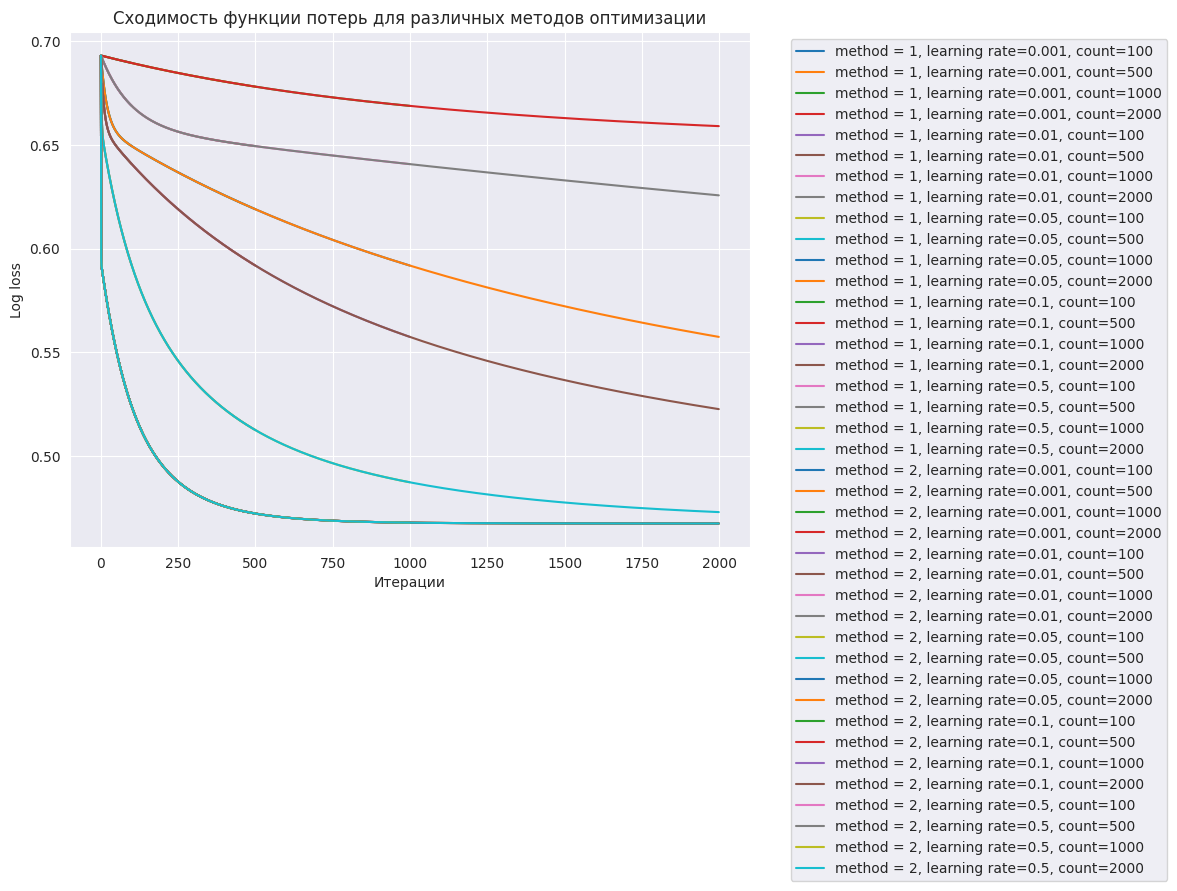

In [92]:
plt.figure(figsize=(12,8))
for (method, rate, count), data in results.items():
    plt.plot(data["losses"], label=f"method = {method}, learning rate={rate}, count={count}")
plt.title("Сходимость функции потерь для различных методов оптимизации")
plt.xlabel("Итерации")
plt.ylabel("Log loss")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
